In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

In [4]:
taxi = pd.read_csv('./3_taxi_peru.csv', sep=';', parse_dates=['start_at', 'end_at', 'arrived_at'])

In [5]:
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0


In [23]:
#task 9 Проверьте, с какой платформы было сделано больше всего заказов. 
#       В ответе укажите значение в %, округлённое до целого.
t = taxi.groupby('source', as_index=False).agg({'journey_id':'count'}).sort_values('journey_id',ascending=False)

In [24]:
t['q'] = (t.journey_id / t.journey_id.sum()).round(2)

In [25]:
t

,source,journey_id,q
3,iPhone,9741,0.42
4,web,7631,0.33
0,Android,4909,0.21
2,iPad,571,0.02
1,Wap,136,0.01


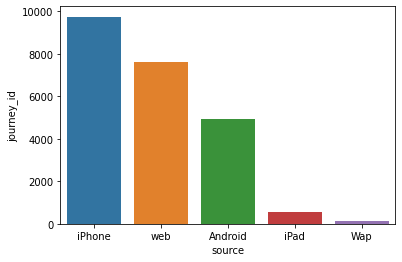

In [30]:
#task 10
ax = sns.barplot(x = 'source', y = 'journey_id', data = t)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


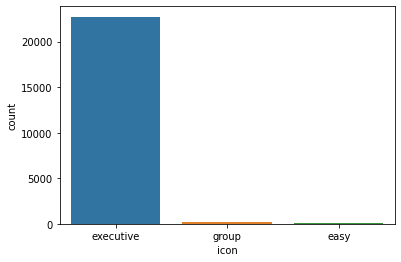

In [34]:
#task 11
sns.countplot(taxi['icon'])

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


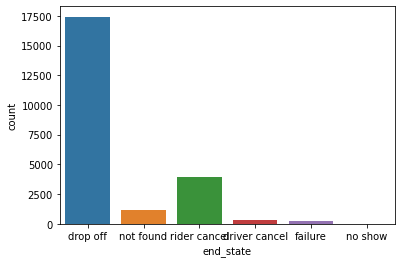

In [38]:
sns.countplot(taxi['end_state'])

In [45]:
gg = taxi.groupby('source').agg({'end_state' : 'count'})

In [47]:
gg.head()

,end_state
source,
Android,4904
Wap,136
iPad,571
iPhone,9734
web,7631


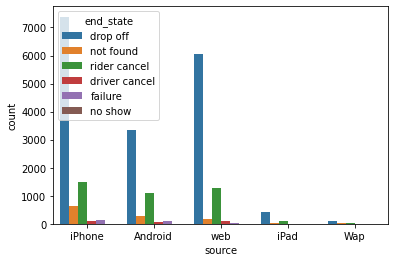

In [58]:
#task 12
k = sns.countplot(x='source',hue='end_state', data = taxi)

In [278]:
dd = (taxi.driver_score.value_counts() / taxi.driver_score.count()).mul(100).round(2).reset_index().rename({'index':'driver_score','driver_score':'percentage'}).sort_values('driver_score',ascending=True)

In [279]:
dd

,index,driver_score
5,2.0,0.81
4,1.0,1.23
3,3.0,2.97
2,0.0,14.30
1,4.0,21.88
0,5.0,58.81


In [259]:
dss.sort_values('driver_score')

,index,driver_score
5,2.0,0.81
4,1.0,1.23
3,3.0,2.97
2,0.0,14.30
1,4.0,21.88
0,5.0,58.81


In [296]:
driver_score_counts = taxi.driver_score.value_counts(normalize=True).mul(100).round(2).reset_index().rename(columns={'index':'driver_score','driver_score':'percentage'}).sort_values('driver_score',ascending=True)

In [297]:
driver_score_counts

,driver_score,percentage
2,0.0,14.30
4,1.0,1.23
5,2.0,0.81
3,3.0,2.97
1,4.0,21.88
0,5.0,58.81


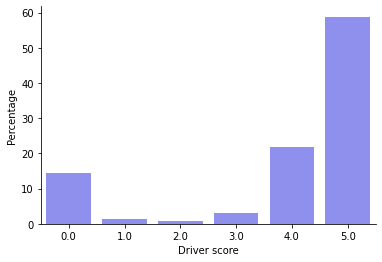

In [298]:
ax = sns.barplot(x='driver_score', y='percentage', data=driver_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()

In [302]:
rider_score_counts = taxi.rider_score.value_counts(normalize=True).mul(100).round(2).reset_index().rename(columns={'index':'rider_score','rider_score':'percentage'}).sort_values('rider_score',ascending=True)

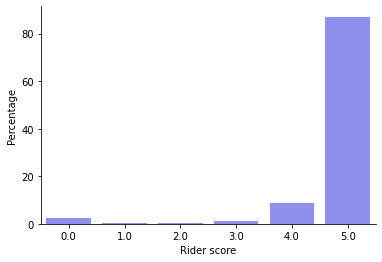

In [303]:
ax = sns.barplot(x='rider_score', y='percentage', data=rider_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Rider score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()